In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import bocd

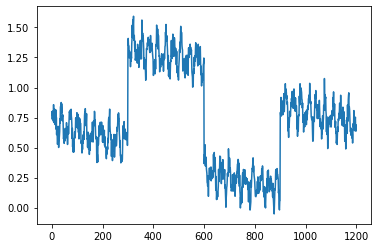

In [2]:
# Generate test data
index =  np.arange(1200)
test_signal_seasonal = np.concatenate(
    [np.random.normal(0.7, 0.05, 300), 
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.3, 0.05, 300)]) - index  / 2000.0 + np.sin(index / 5.0) / 10.0 + np.cos(index / 3.0) / 15.0
plt.plot(test_signal_seasonal)

In [3]:
# Initialize object
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(300), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(test_signal_seasonal.shape)
for i, d in enumerate(test_signal_seasonal):
    bc.update(d)
    rt_mle[i] = bc.rt

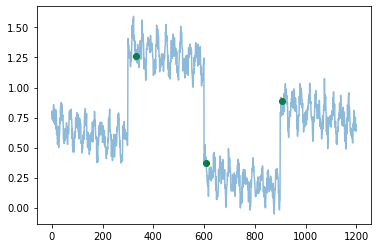

In [4]:
# Plot data with estimated change points
plt.plot(test_signal_seasonal, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, test_signal_seasonal[index_changes], c='green', label="change point")